Week 1 - I thought it would be interesting to get myself started by analyzing stocks and the weather in New York City.
I downloaded historic data of diferent stocks from nasdaq and added the daily average weather in New York City Central Park Area to the csv file. The weather data was obtained from here: https://www.weather.gov/wrh/climate?wfo=okx

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('GOOGL-11-15-1m.csv')
data.head()

,Date,Close/Last,Volume,Open,High,Low,NY Temp
0,11/15/2021,"$2,969.04",1175352,"$2,978.01","$2,990.99","$2,951.50",43.0
1,11/12/2021,"$2,973.56",1118000,"$2,932.31","$2,977","$2,908.22",58.0
2,11/11/2021,"$2,915.33",825874,"$2,929.79","$2,950.71","$2,912.01",53.0
3,11/10/2021,"$2,917.87",1498490,"$2,950","$2,961.40","$2,890.75",56.5
4,11/9/2021,"$2,978.37",976487,"$2,984.66","$2,996.69","$2,944.90",59.0


I'm only going to look at Closing/Last and NY Temp so I dropped the other columns. Cleaned the data by changing the dates to datetime and the prices into float.

In [2]:
data.drop(columns=['Volume', 'Open', 'High', 'Low'], inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data['Close/Last'] = data['Close/Last'].str.replace(',', '').str.replace('$', '').astype(float)
data.head()

<ipython-input-2-a4f7fbad9d4c>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data['Close/Last'] = data['Close/Last'].str.replace(',', '').str.replace('$', '').astype(float)


,Date,Close/Last,NY Temp
0,2021-11-15,2969.04,43.0
1,2021-11-12,2973.56,58.0
2,2021-11-11,2915.33,53.0
3,2021-11-10,2917.87,56.5
4,2021-11-09,2978.37,59.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        22 non-null     datetime64[ns]
 1   Close/Last  22 non-null     float64       
 2   NY Temp     22 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 656.0 bytes


Looked for the correlation between weather and the closing price of the stock. Since the correlation is negative, I assume that when it's colder in New York City the closing price will be higher.

In [4]:
corr = data.corr()
corr

,Close/Last,NY Temp
Close/Last,1.000000,-0.673085
NY Temp,-0.673085,1.000000


Looked at a boxplot of the daily average temperature in New York to get a sense of what should be considered cold and hot

<AxesSubplot:ylabel='NY Temp'>

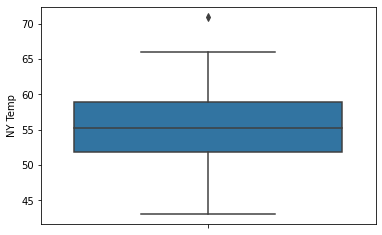

In [5]:
import seaborn as sns
sns.boxplot(y="NY Temp", data=data)

I repeated the same steps with other tech companies, and chose the 3 that had the strongest correlation to weather to invest in (GOOGl, MSFT, AAPL). This week I will buy the stock when the weather in New York City is above the median, and maybe sell when it is below the median.

In [6]:
data = pd.read_csv('MSFT-11-15-1m.csv')
data.drop(columns=['Volume', 'Open', 'High', 'Low'], inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data['Close/Last'] = data['Close/Last'].str.replace(',', '').str.replace('$', '').astype(float)
corr = data.corr()
corr

<ipython-input-6-c6f4bee4ad4f>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data['Close/Last'] = data['Close/Last'].str.replace(',', '').str.replace('$', '').astype(float)


,Close/Last,NY Temp
Close/Last,1.000000,-0.737745
NY Temp,-0.737745,1.000000


In [7]:
data = pd.read_csv('FB-11-15-1m.csv')
data.drop(columns=['Volume', 'Open', 'High', 'Low'], inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data['Close/Last'] = data['Close/Last'].str.replace(',', '').str.replace('$', '').astype(float)
corr = data.corr()
corr

<ipython-input-7-4f61c69e4e1f>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data['Close/Last'] = data['Close/Last'].str.replace(',', '').str.replace('$', '').astype(float)


,Close/Last,NY Temp
Close/Last,1.00000,-0.19142
NY Temp,-0.19142,1.00000


In [8]:
data = pd.read_csv('AMZN-11-15-1m.csv')
data.drop(columns=['Volume', 'Open', 'High', 'Low'], inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data['Close/Last'] = data['Close/Last'].str.replace(',', '').str.replace('$', '').astype(float)
corr = data.corr()
corr

<ipython-input-8-0e70b230f70c>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data['Close/Last'] = data['Close/Last'].str.replace(',', '').str.replace('$', '').astype(float)


,Close/Last,NY Temp
Close/Last,1.000000,-0.252574
NY Temp,-0.252574,1.000000


In [9]:
data = pd.read_csv('AAPL-11-15-1m.csv')
data.drop(columns=['Volume', 'Open', 'High', 'Low'], inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data['Close/Last'] = data['Close/Last'].str.replace(',', '').str.replace('$', '').astype(float)
corr = data.corr()
corr

<ipython-input-9-62444ce90a8c>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data['Close/Last'] = data['Close/Last'].str.replace(',', '').str.replace('$', '').astype(float)


,Close/Last,NY Temp
Close/Last,1.000000,-0.563166
NY Temp,-0.563166,1.000000
